In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

from pathlib import Path

national_death_rates_path= Path("NCHS_-_Leading_Causes_of_Death__United_States.csv")
heart_mortality_path=Path("Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County_20240411.csv")

death_rates_data=pd.read_csv(national_death_rates_path)
heart_mortality_data=pd.read_csv(heart_mortality_path)

death_rates_data.head()
# heart_mortality_data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,"169,936",49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,"2,703",53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,"4,184",56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,"1,625",51.8


In [2]:
heart_disease_rate = death_rates_data.loc[(death_rates_data["Cause Name"]=="Heart disease")&(death_rates_data["State"]=="United States")]
heart_disease_rate



,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
312,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"647,457",165.0
929,2016,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"635,260",165.5
1501,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"633,842",168.5
2074,2014,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"614,348",167.0
2648,2013,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"611,105",169.8
3220,2012,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"599,711",170.5
3793,2011,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"596,577",173.7
4365,2010,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"597,689",179.1
4953,2009,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"599,413",182.8
5527,2008,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,"616,828",192.1


In [3]:
heart_disease_rate.dtypes

Year                        int64
113 Cause Name             object
Cause Name                 object
State                      object
Deaths                     object
Age-adjusted Death Rate    object
dtype: object

In [4]:
heart_disease_rate["Deaths"]= heart_disease_rate["Deaths"].str.replace(",","").astype(float)

/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_36175/2226713647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_rate["Deaths"]= heart_disease_rate["Deaths"].str.replace(",","").astype(float)


In [5]:
heart_disease_rate

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
312,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,647457.0,165.0
929,2016,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,635260.0,165.5
1501,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,633842.0,168.5
2074,2014,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,614348.0,167.0
2648,2013,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,611105.0,169.8
3220,2012,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,599711.0,170.5
3793,2011,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,596577.0,173.7
4365,2010,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,597689.0,179.1
4953,2009,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,599413.0,182.8
5527,2008,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,United States,616828.0,192.1


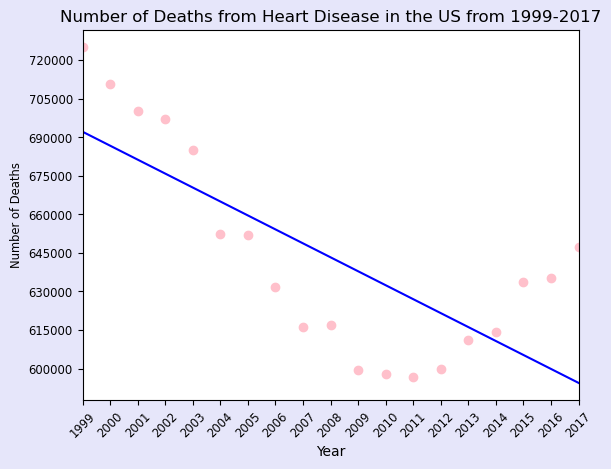

In [12]:
heart_x= heart_disease_rate["Year"]
heart_y= heart_disease_rate["Deaths"]

plt.figure(facecolor="lavender")
plt.scatter(heart_x,heart_y, color= "pink")

plt.xlabel("Year")
plt.ylabel("Number of Deaths", fontsize="small")
plt.title("Number of Deaths from Heart Disease in the US from 1999-2017")

plt.xlim(1999,2017)
plt.xticks(range(1999,2018,1))
plt.xticks(rotation=45, fontsize="small")

plt.yticks(range(600000,750000,15000), fontsize="small")

slope, intercept, rvalue, p_value, std_err =linregress(heart_x, heart_y)
correlation_coefficient=heart_x.corr(heart_y)
plt.plot(heart_x, slope* heart_x +intercept,color="blue")
# plt.text(2007,660000,f"slope= {slope:.2f}", color="blue")
plt.savefig("US_Mortality.png",format="png")




In [14]:
illinois_rates=death_rates_data.loc[(death_rates_data["Cause Name"]=="Heart disease")&(death_rates_data["State"]=="Illinois")]
illinois_rates

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
326,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"25,394",163.3
898,2016,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"25,013",165.7
1470,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"25,652",171.5
2043,2014,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"25,024",169.7
2617,2013,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"24,839",170.9
3189,2012,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"24,667",172.7
3762,2011,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"24,987",178.1
4334,2010,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"24,959",181.7
4922,2009,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"24,931",184.0
5496,2008,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,"26,078",195.1


In [15]:
illinois_rates["Deaths"]= illinois_rates["Deaths"].str.replace(",","").astype(float)
illinois_rates

/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_36175/4285511440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois_rates["Deaths"]= illinois_rates["Deaths"].str.replace(",","").astype(float)


,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
326,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,25394.0,163.3
898,2016,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,25013.0,165.7
1470,2015,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,25652.0,171.5
2043,2014,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,25024.0,169.7
2617,2013,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24839.0,170.9
3189,2012,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24667.0,172.7
3762,2011,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24987.0,178.1
4334,2010,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24959.0,181.7
4922,2009,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,24931.0,184.0
5496,2008,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Illinois,26078.0,195.1


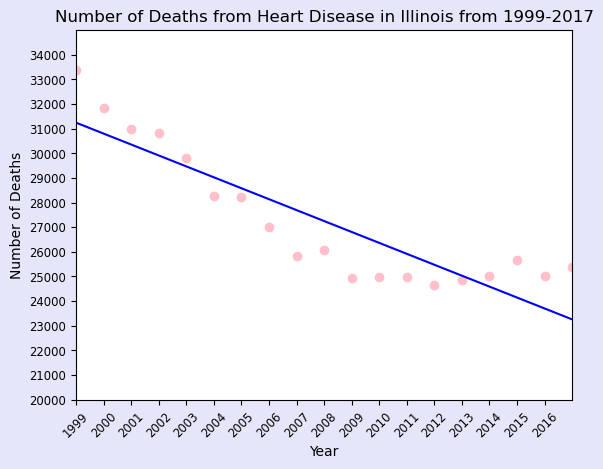

In [23]:
il_x= illinois_rates["Year"]
il_y= illinois_rates["Deaths"]

plt.figure(facecolor="lavender")
plt.scatter(il_x,il_y, color="pink")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("Number of Deaths from Heart Disease in Illinois from 1999-2017")

plt.xlim(1999,2017)
plt.xticks(range(1999,2017,1))
plt.xticks(rotation=45, fontsize="small")

plt.ylim(20000,35000)
plt.yticks(range(20000,35000,1000))
plt.yticks(fontsize="small")

slope, intercept, rvalue, p_value, std_err =linregress(il_x, il_y)
correlation_coefficient=il_x.corr(il_y)
plt.plot(il_x, slope* il_x +intercept,color="blue")
# plt.text(2007,28000,f"Slope= {slope:.2f}", color="blue")
plt.savefig("IL_Mortality.png",format="png")


In [17]:
state_rate_start=death_rates_data.loc[(death_rates_data["Cause Name"]=="Heart disease")&(death_rates_data["Year"]==1999)&(death_rates_data["State"]!="United States")]
state_rate_start

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10608,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,"13,419",303.0
10609,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alaska,563,198.0
10610,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arizona,"10,800",223.1
10611,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arkansas,"8,315",287.8
10612,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,California,"71,930",257.3
10613,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Colorado,"6,420",196.3
10614,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Connecticut,"9,127",238.8
10615,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Delaware,"2,011",269.2
10616,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,District of Columbia,"1,652",296.2
10617,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Florida,"51,434",247.7


In [18]:
state_rate_last=death_rates_data.loc[(death_rates_data["Cause Name"]=="Heart disease")&(death_rates_data["Year"]==2017)&(death_rates_data["State"]!= "United States")]
state_rate_last
# state_rate_last.count()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
313,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,"13,110",223.2
314,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alaska,814,135.0
315,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arizona,"12,398",141.9
316,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arkansas,"8,270",223.8
317,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,California,"62,797",142.9
318,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Colorado,"7,060",122.7
319,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Connecticut,"7,138",141.6
320,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Delaware,"1,990",158.4
321,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,District of Columbia,"1,284",189.8
322,2017,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Florida,"46,440",145.8


In [19]:
percent_change=pd.merge(state_rate_start,state_rate_last, how="left", on=("State","Cause Name","113 Cause Name"), suffixes=("_1999","_2017"))
percent_change


,Year_1999,113 Cause Name,Cause Name,State,Deaths_1999,Age-adjusted Death Rate_1999,Year_2017,Deaths_2017,Age-adjusted Death Rate_2017
0,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alabama,"13,419",303.0,2017,"13,110",223.2
1,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Alaska,563,198.0,2017,814,135.0
2,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arizona,"10,800",223.1,2017,"12,398",141.9
3,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Arkansas,"8,315",287.8,2017,"8,270",223.8
4,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,California,"71,930",257.3,2017,"62,797",142.9
5,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Colorado,"6,420",196.3,2017,"7,060",122.7
6,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Connecticut,"9,127",238.8,2017,"7,138",141.6
7,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Delaware,"2,011",269.2,2017,"1,990",158.4
8,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,District of Columbia,"1,652",296.2,2017,"1,284",189.8
9,1999,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,Florida,"51,434",247.7,2017,"46,440",145.8


In [20]:
# cleaning up df to only include values wanted
filtered_df=percent_change[["Cause Name","State", "Deaths_1999","Deaths_2017"]]

filtered_df["Deaths_1999"]= filtered_df["Deaths_1999"].str.replace(",","").astype(float)
filtered_df["Deaths_2017"]= filtered_df["Deaths_2017"].str.replace(",","").astype(float)
filtered_df

/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_36175/587480348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Deaths_1999"]= filtered_df["Deaths_1999"].str.replace(",","").astype(float)
/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_36175/587480348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Deaths_2017"]= filtered_df["Deaths_2017"].str.replace(",","").astype(float)


,Cause Name,State,Deaths_1999,Deaths_2017
0,Heart disease,Alabama,13419.0,13110.0
1,Heart disease,Alaska,563.0,814.0
2,Heart disease,Arizona,10800.0,12398.0
3,Heart disease,Arkansas,8315.0,8270.0
4,Heart disease,California,71930.0,62797.0
5,Heart disease,Colorado,6420.0,7060.0
6,Heart disease,Connecticut,9127.0,7138.0
7,Heart disease,Delaware,2011.0,1990.0
8,Heart disease,District of Columbia,1652.0,1284.0
9,Heart disease,Florida,51434.0,46440.0


In [21]:
# Code was written with help from ChatGPT and references from course materials

# Convert "Deaths_1999" and "Deaths_2017" columns to numeric
filtered_df["Deaths_1999"] = pd.to_numeric(filtered_df["Deaths_1999"])
filtered_df["Deaths_2017"] = pd.to_numeric(filtered_df["Deaths_2017"])

# Initialize list to store percent changes
percent_changes = []

# Calculate percent change for each row
for index, row in filtered_df.iterrows():
    deaths_1999 = row["Deaths_1999"]
    deaths_2017 = row["Deaths_2017"]
    
    # just in case numbers contain 0, 
    if deaths_1999 != 0:
        percent_change_value = ((deaths_2017 - deaths_1999) / deaths_1999) * 100
    else:
        percent_change_value = None  # Set to None if deaths_1999 is zero
        
    percent_changes.append(percent_change_value)

# Add "Percent Change" column to DataFrame
filtered_df["Percent Change"] = percent_changes

filtered_df["Percent Change"] = filtered_df["Percent Change"].map("{:.2f}".format)
# Display DataFrame
filtered_df



/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_36175/2523246704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Deaths_1999"] = pd.to_numeric(filtered_df["Deaths_1999"])
/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_36175/2523246704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Deaths_2017"] = pd.to_numeric(filtered_df["Deaths_2017"])
/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_36175/2523246704.py:22: SettingWithCopyWarning: 
A valu

,Cause Name,State,Deaths_1999,Deaths_2017,Percent Change
0,Heart disease,Alabama,13419.0,13110.0,-2.30
1,Heart disease,Alaska,563.0,814.0,44.58
2,Heart disease,Arizona,10800.0,12398.0,14.80
3,Heart disease,Arkansas,8315.0,8270.0,-0.54
4,Heart disease,California,71930.0,62797.0,-12.70
5,Heart disease,Colorado,6420.0,7060.0,9.97
6,Heart disease,Connecticut,9127.0,7138.0,-21.79
7,Heart disease,Delaware,2011.0,1990.0,-1.04
8,Heart disease,District of Columbia,1652.0,1284.0,-22.28
9,Heart disease,Florida,51434.0,46440.0,-9.71


/var/folders/2k/_5w54ms57s354pk985m8f6fr0000gn/T/ipykernel_36175/2114129900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Percent Change'] = pd.to_numeric(filtered_df['Percent Change'])


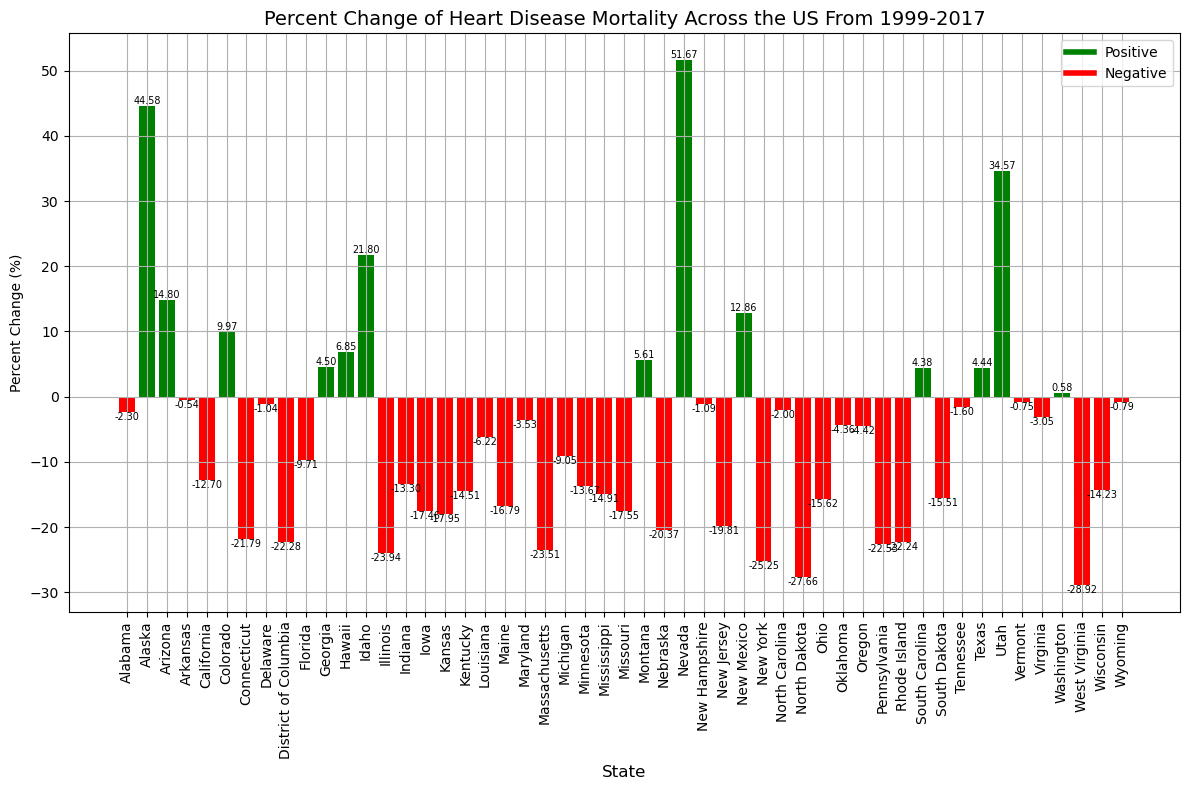

In [24]:

filtered_df['Percent Change'] = pd.to_numeric(filtered_df['Percent Change'])

# Define categories (states) and values (percent changes)
states = filtered_df["State"]
values = filtered_df["Percent Change"]

# code was written with help from chatgpt
colors = ['green' if v >= 0 else 'red' for v in values]


plt.figure(figsize=(12, 8)) 
bars = plt.bar(states, values, color=colors)


plt.xlabel('State', fontsize=12)
plt.ylabel('Percent Change (%)', fontsize=10)
plt.title('Percent Change of Heart Disease Mortality Across the US From 1999-2017', fontsize=14)

# Customize colors in legend, code written with help from chatgpt to include a negative y axis
positive_bar = plt.Line2D([0], [0], color='green', linewidth=4)
negative_bar = plt.Line2D([0], [0], color='red', linewidth=4)
plt.legend([positive_bar, negative_bar], ['Positive', 'Negative'], loc='upper right')

# formatting to add values in text on bars, code written with help from chatgpt
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom' if yval >= 0 else 'top', fontsize="x-small")

# Show the plot
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("Percent_Change.png", format="png")



([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, '-2.30'),
  Text(0, 1, '44.58'),
  Text(0, 2, '14.80'),
  Text(0, 3, '-0.54'),
  Text(0, 4, '-12.70'),
  Text(0, 5, '9.97'),
  Text(0, 6, '-21.79'),
  Text(0, 7, '-1.04'),
  Text(0, 8, '-22.28'),
  Text(0, 9, '-9.71'),
  Text(0, 10, '4.50'),
  Text(0, 11, '6.85'),
  Text(0, 12, '21.80'),
  Text(0, 13, '-23.94'),
  Text(0, 14, '-13.30'),
  Text(0, 15, '-17.46'),
  Text(0, 16, '-17.95'),
  Text(0, 17, '-14.51'),
  Text(0, 18, '-6.22'),
  Text(0, 19, '-16.79'),
  Text(0, 20, '-3.53'),
  Text(0, 21, '-23.51'),
  Text(0, 22, '-9.05'),
  Text(0, 23, '-13.67'),
  Text(0, 24, '-14.91'),
  Text(0, 25, '-17.55'),
  Text(0, 26, '5.61'),
  Text(0, 27, '-20.37'),
  Text(0, 28, '51.67'),
  Text(

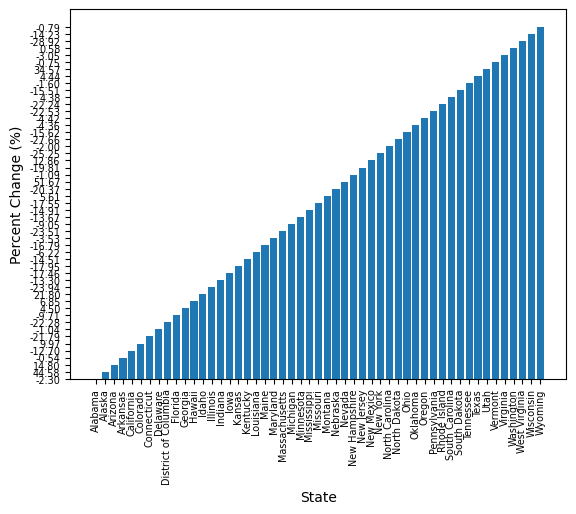

In [63]:
plt.bar(filtered_df["State"], filtered_df["Percent Change"])
plt.xlabel("State")
plt.ylabel("Percent Change (%)")

plt.xticks(rotation=90, fontsize="x-small")

# plt.ylim(-28,45)
# plt.yticks(range(-28,45,1))
plt.yticks(fontsize="x-small")